# Exploratory Data Analysis

### Columns dictionary

<img src="../img/data_dictionary.png" alt="Columns dictionary" style="width:75%; max-width:700px;">


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


PATH = os.path.join(os.path.dirname(os.getcwd()), "data/raw/mars-weather.csv")
grouper_m = pd.Grouper(key='terrestrial_date', freq='ME')
grouper_w = pd.Grouper(key='terrestrial_date', freq='W')
grouper_d = pd.Grouper(key='terrestrial_date', freq='D')

In [2]:
df = pd.read_csv(PATH)
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df["id"] = df["id"].astype("object")
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1894 non-null   object        
 1   terrestrial_date  1894 non-null   datetime64[ns]
 2   sol               1894 non-null   int64         
 3   ls                1894 non-null   int64         
 4   month             1894 non-null   object        
 5   min_temp          1867 non-null   float64       
 6   max_temp          1867 non-null   float64       
 7   pressure          1867 non-null   float64       
 8   wind_speed        0 non-null      float64       
 9   atmo_opacity      1894 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 148.1+ KB


### Checking Missingness

In [4]:
df.isna().mean()

id                  0.000000
terrestrial_date    0.000000
sol                 0.000000
ls                  0.000000
month               0.000000
min_temp            0.014256
max_temp            0.014256
pressure            0.014256
wind_speed          1.000000
atmo_opacity        0.000000
dtype: float64

In [5]:
cond = df["min_temp"].isna()
df.loc[cond, ["min_temp", "max_temp", "pressure"]].isna().mean()

min_temp    1.0
max_temp    1.0
pressure    1.0
dtype: float64

Unfortunately, the column `wind_speed` is completely null, so it will not be useful for us.

The columns `min_temp`, `max_temp` and `pressure` also have a small percentage of null values (around 1.43%). The missingness appears to affect all three columns equally: when one of them is null also the others.

### Cheking for high cardinality and one value columns

In [6]:
for c in df.select_dtypes(include=object):
    print("->",f"{c}: {df[c].nunique()} unique values")

-> id: 1894 unique values
-> month: 12 unique values
-> atmo_opacity: 2 unique values


In [7]:
for c in df.select_dtypes(include=object):
    display(df[c].value_counts(True,dropna=False)[:15])
    print("-"*30)

id
1895    0.000528
1893    0.000528
1894    0.000528
1892    0.000528
1889    0.000528
1891    0.000528
1890    0.000528
1888    0.000528
1887    0.000528
1886    0.000528
1885    0.000528
1884    0.000528
1883    0.000528
1882    0.000528
1881    0.000528
Name: proportion, dtype: float64

------------------------------


month
Month 4     0.102429
Month 3     0.102429
Month 2     0.096093
Month 1     0.092925
Month 12    0.087645
Month 6     0.080781
Month 5     0.078669
Month 11    0.076558
Month 7     0.074974
Month 8     0.074446
Month 9     0.071806
Month 10    0.061246
Name: proportion, dtype: float64

------------------------------


atmo_opacity
Sunny    0.998416
--       0.001584
Name: proportion, dtype: float64

------------------------------


The share of the martian months is not equal for all months, but this might not be a problem.

It's also observable that the column `atmo_opacity` is unary, and that it also had non informed values but these were set as "--". 

### Distributions and quick stats

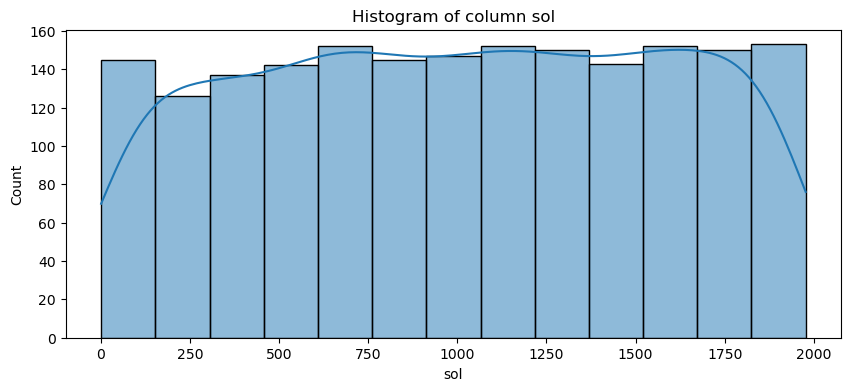

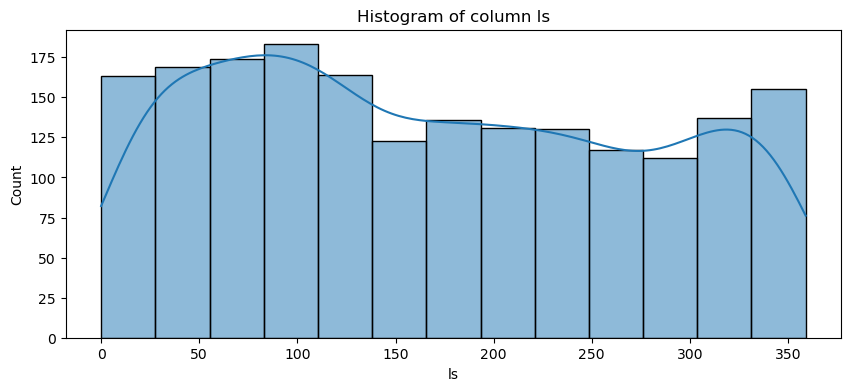

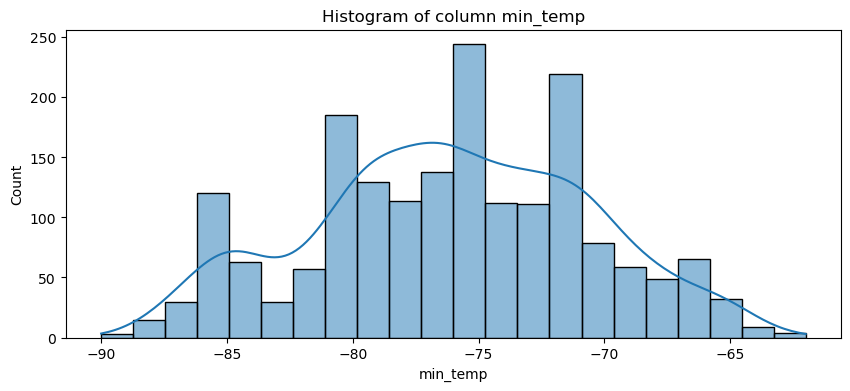

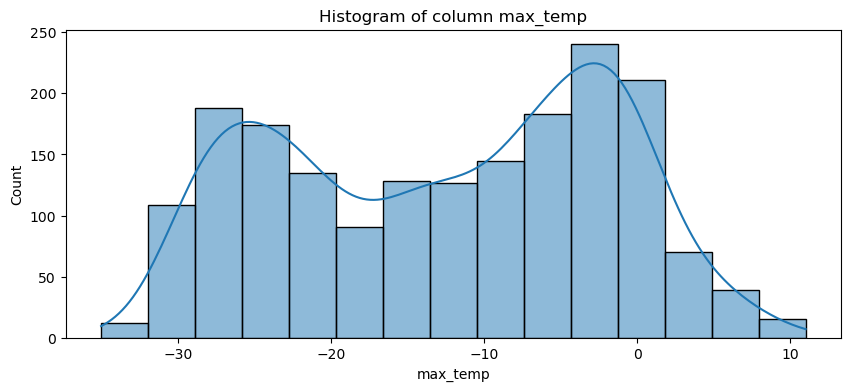

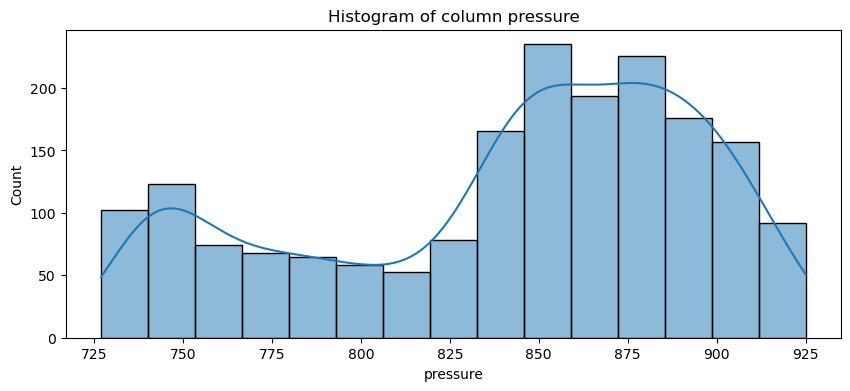

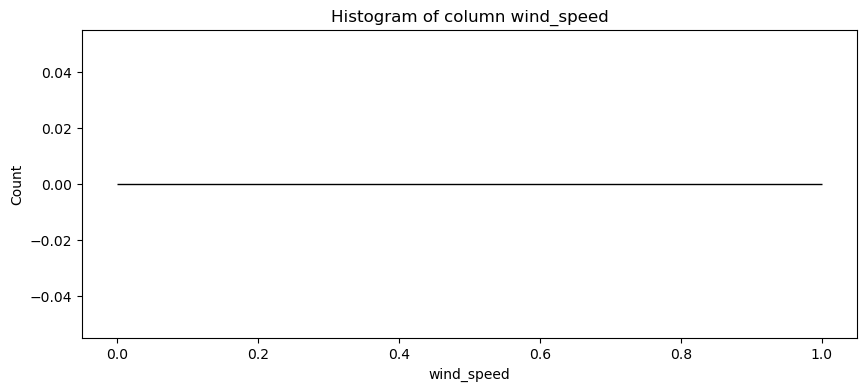

In [ ]:
for c in df.select_dtypes(include=[np.float64, np.int64]):
    plt.figure(figsize=(10, 4))
    sns.histplot(df[c], kde=True)
    plt.title(f"Histogram of column {c}")
    plt.show()

In [13]:
df.describe(include="all")

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
count,1894.0,1894,1894.000000,1894.000000,1894,1867.000000,1867.000000,1867.000000,0.0,1894
unique,1894.0,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,2
top,1895.0,NaN,NaN,NaN,Month 4,NaN,NaN,NaN,NaN,Sunny
freq,1.0,NaN,NaN,NaN,194,NaN,NaN,NaN,NaN,1891
mean,NaN,2015-06-07 05:29:58.099261184,1007.930306,169.180570,NaN,-76.121050,-12.510445,841.066417,NaN,NaN
min,NaN,2012-08-07 00:00:00,1.000000,0.000000,NaN,-90.000000,-35.000000,727.000000,NaN,NaN
25%,NaN,2014-02-03 06:00:00,532.250000,78.000000,NaN,-80.000000,-23.000000,800.000000,NaN,NaN
50%,NaN,2015-06-16 12:00:00,1016.500000,160.000000,NaN,-76.000000,-11.000000,853.000000,NaN,NaN
75%,NaN,2016-10-26 18:00:00,1501.750000,259.000000,NaN,-72.000000,-3.000000,883.000000,NaN,NaN
max,NaN,2018-02-27 00:00:00,1977.000000,359.000000,NaN,-62.000000,11.000000,925.000000,NaN,NaN


### Time series visualizations

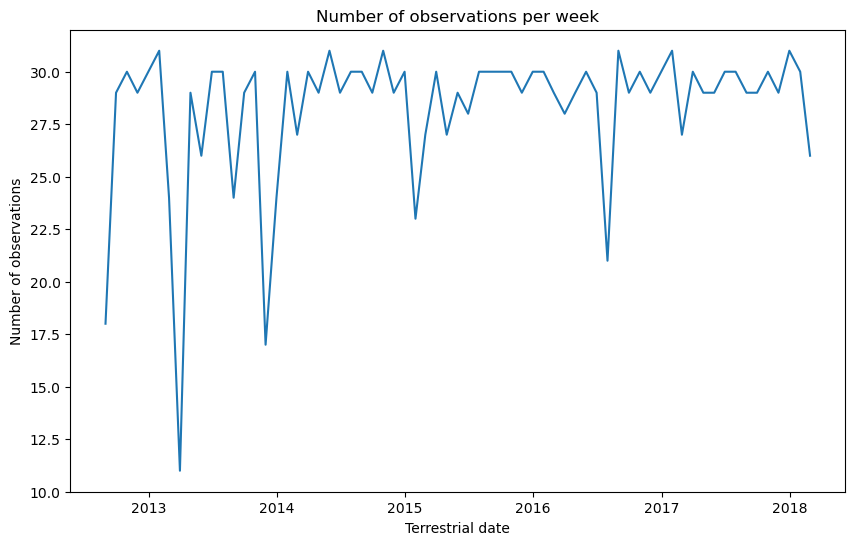

In [ ]:
aux = df.groupby(grouper_m)["id"].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x = "terrestrial_date", y="id", data=aux)
plt.ylabel("Number of observations")
plt.xlabel("Terrestrial date")
plt.title("Number of observations per week")
plt.show()

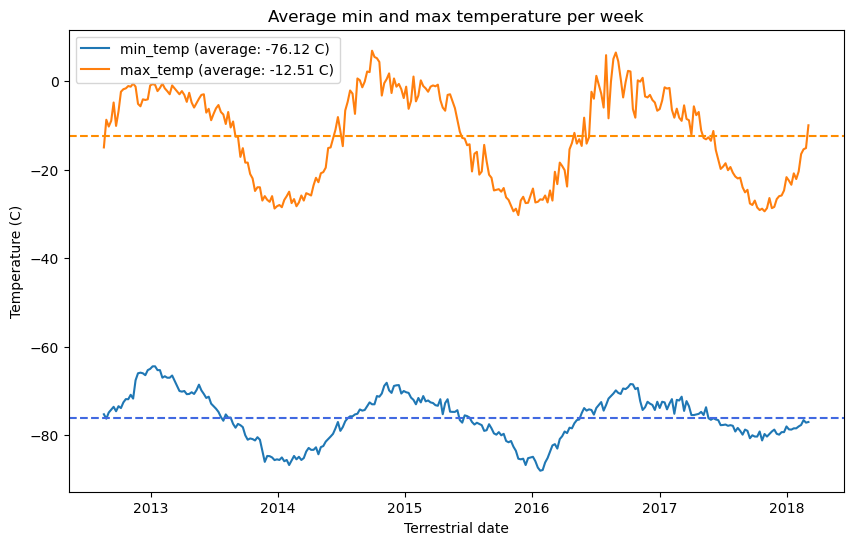

In [ ]:
aux = df.groupby(grouper_w)[["min_temp","max_temp","pressure"]].mean().reset_index()
averages = df[["min_temp", "max_temp", "pressure"]].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(
    x="terrestrial_date",
    y="min_temp",
    data=aux,
    label="min_temp (average: {:.2f} C)".format(averages["min_temp"]),
)
sns.lineplot(
    x="terrestrial_date",
    y="max_temp",
    data=aux,
    label="max_temp (average: {:.2f} C)".format(averages["max_temp"]),
)
plt.axhline(
    y=averages["min_temp"], color="royalblue", linestyle="--", label="average min temp"
)
plt.axhline(
    y=averages["max_temp"], color="darkorange", linestyle="--", label="average max temp"
)
plt.ylabel("Temperature (C)")
plt.xlabel("Terrestrial date")
plt.title("Average min and max temperature per week")
plt.show()

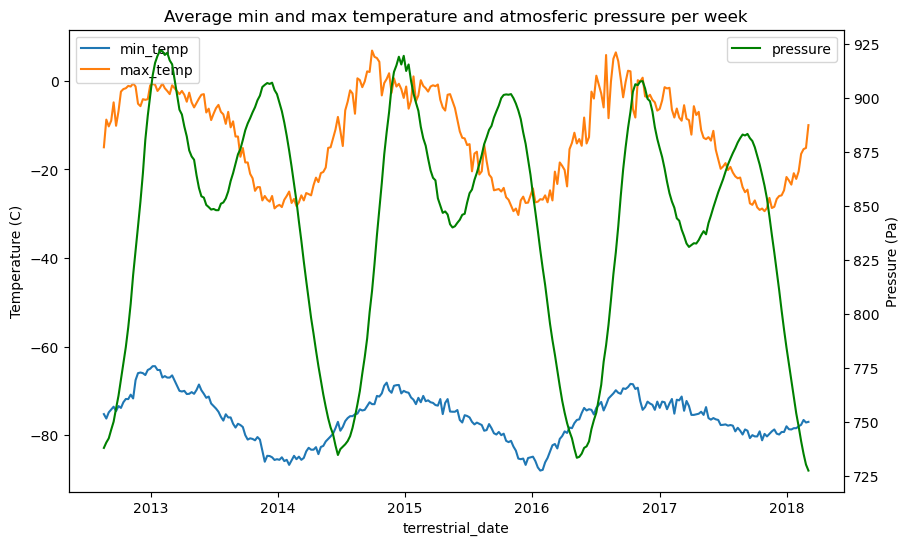

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = "terrestrial_date", y="min_temp", data=aux, label = "min_temp")
sns.lineplot(x = "terrestrial_date", y="max_temp", data=aux, label = "max_temp")
plt.ylabel("Temperature (C)")
plt.legend(loc="upper left")
plt.twinx()
sns.lineplot(x = "terrestrial_date", y="pressure", data=aux, label = "pressure", color="green")
plt.ylabel("Pressure (Pa)")
plt.legend(loc="upper right")
plt.xlabel("Terrestrial date")
plt.title("Average min and max temperature and atmosferic pressure per week")
plt.show()

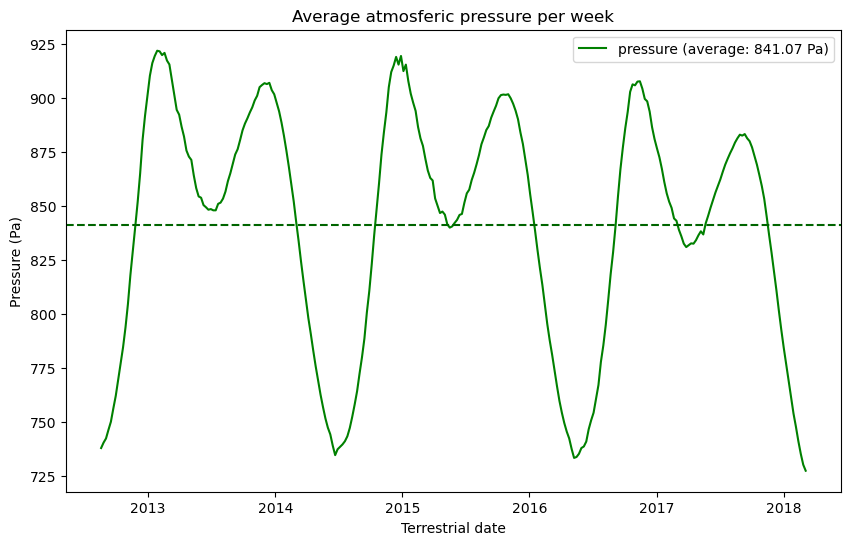

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="terrestrial_date",
    y="pressure",
    data=aux,
    label="pressure (average: {:.2f} Pa)".format(averages["pressure"]),
    color="green",
)
plt.axhline(
    y=averages["pressure"],
    color="darkgreen",
    linestyle="--",
)
plt.ylabel("Pressure (Pa)")
plt.xlabel("Terrestrial date")
plt.title("Average atmosferic pressure per week")
plt.show()

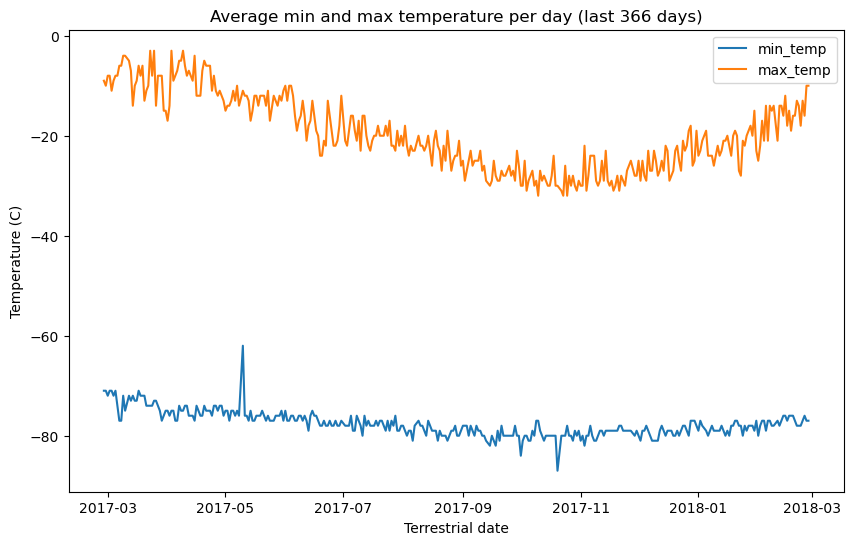

In [35]:
aux = df.groupby(grouper_d)[["min_temp","max_temp"]].mean().reset_index()[-366:]
plt.figure(figsize=(10, 6))
sns.lineplot(x = "terrestrial_date", y="min_temp", data=aux, label = "min_temp")
sns.lineplot(x = "terrestrial_date", y="max_temp", data=aux, label = "max_temp")
plt.ylabel("Temperature (C)")
plt.xlabel("Terrestrial date")
plt.title("Average min and max temperature per day (last 366 days)")
plt.show()

/var/folders/gc/x3q0m4h564d61kh41xdz_gy00000gn/T/ipykernel_75230/184900656.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("month")[["min_temp", "max_temp", "pressure"]]


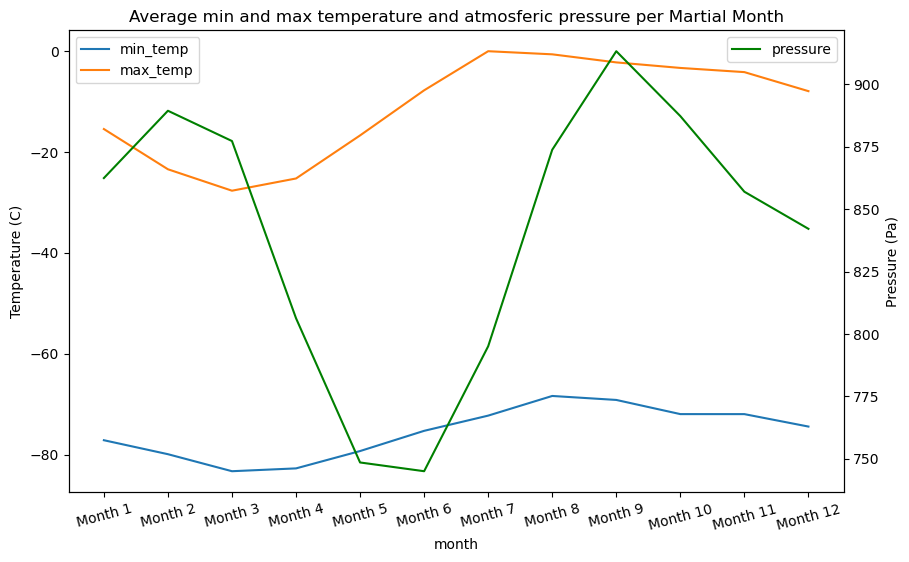

In [79]:
month_order = [f"Month {m}" for m in range(1, 13)]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

aux = (
    df.groupby("month")[["min_temp", "max_temp", "pressure"]]
    .mean()
    .reset_index()
    .sort_values("month")
)
plt.figure(figsize=(10, 6))
sns.lineplot(x="month", y="min_temp", data=aux, label="min_temp")
sns.lineplot(x="month", y="max_temp", data=aux, label="max_temp")
plt.xticks(rotation=15)
plt.ylabel("Temperature (C)")
plt.legend(loc="upper left")
plt.twinx()
sns.lineplot(x = "month", y="pressure", data=aux, label = "pressure", color="green")
plt.ylabel("Pressure (Pa)")
plt.legend(loc="upper right")
plt.title("Average min and max temperature and atmosferic pressure per Martial Month")
plt.show()

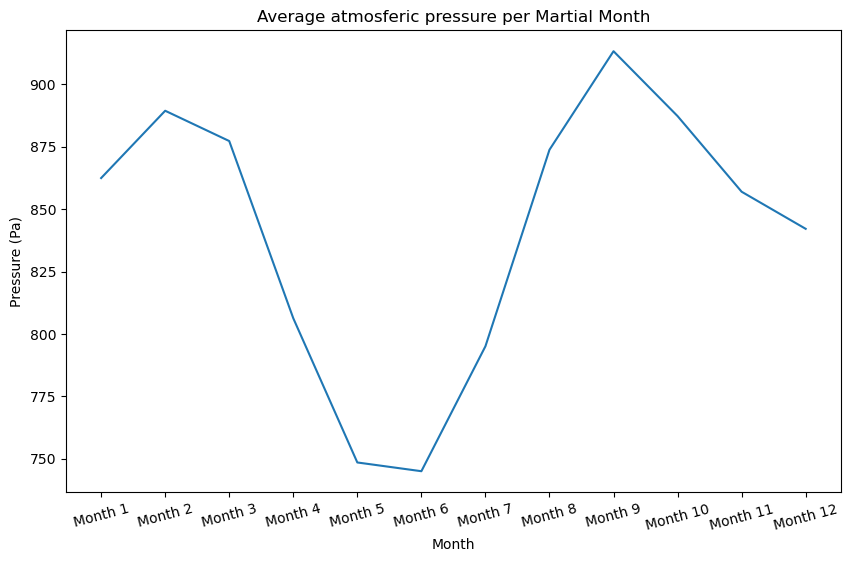

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="month", y="pressure", data=aux)
plt.ylabel("Pressure (Pa)")
plt.xlabel("Month")
plt.xticks(rotation=15)
plt.title("Average atmosferic pressure per Martial Month")
plt.show()

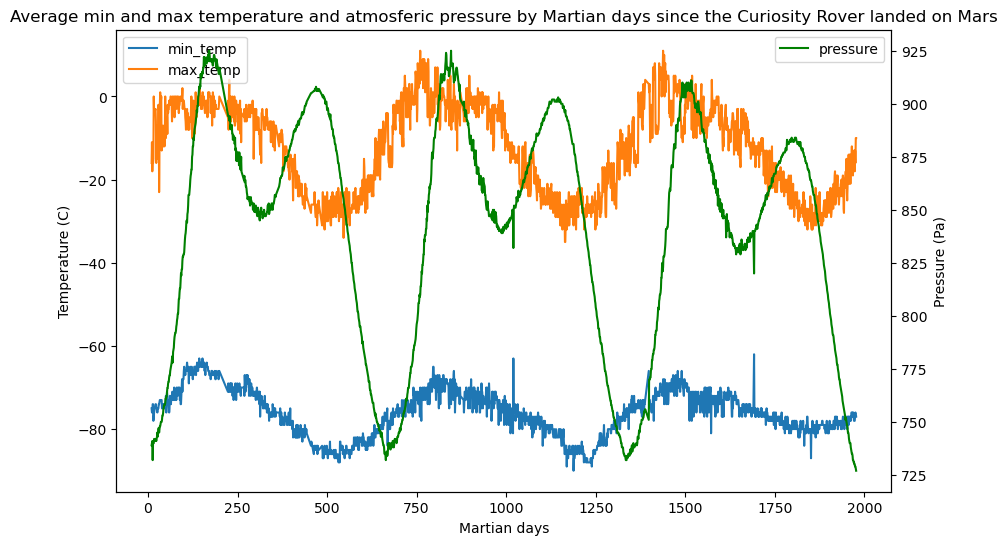

In [ ]:
aux = (
    df.groupby("sol")[["min_temp", "max_temp", "pressure"]]
    .mean()
    .reset_index()
)
plt.figure(figsize=(10, 6))
sns.lineplot(x="sol", y="min_temp", data=aux, label="min_temp")
sns.lineplot(x="sol", y="max_temp", data=aux, label="max_temp")
plt.xlabel("Martian days")
plt.ylabel("Temperature (C)")
plt.legend(loc="upper left")
plt.twinx()
sns.lineplot(x = "sol", y="pressure", data=aux, label = "pressure", color="green")
plt.ylabel("Pressure (Pa)")
plt.legend(loc="upper right")
plt.xticks(rotation=15)
plt.title("Average min and max temperature and atmosferic pressure by Martian days since the Curiosity Rover landed on Mars")
plt.show()

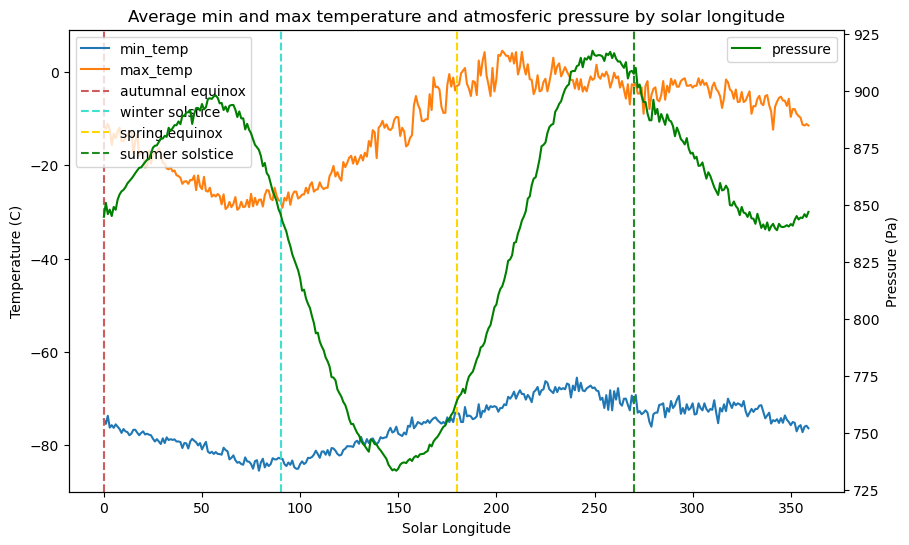

In [82]:
# Since Curiosity is in the Southern Hemisphere, the following ls values are of importance:
# • ls = 0: autumnal equinox
# • ls = 90 : winter solstice
# • ls = 180 : spring equinox
# • ls = 270 : summer solstice

aux = (
    df.groupby("ls")[["min_temp", "max_temp", "pressure"]]
    .mean()
    .reset_index()
)
plt.figure(figsize=(10, 6))
sns.lineplot(x="ls", y="min_temp", data=aux, label="min_temp")
sns.lineplot(x="ls", y="max_temp", data=aux, label="max_temp")
plt.axvline(x=0, color='indianred', linestyle='--', linewidth=1.5, label = "autumnal equinox")
plt.axvline(x=90, color='turquoise', linestyle='--', linewidth=1.5, label = "winter solstice")
plt.axvline(x=180, color='gold', linestyle='--', linewidth=1.5, label = "spring equinox")
plt.axvline(x=270, color='forestgreen', linestyle='--', linewidth=1.5, label = "summer solstice")
plt.xlabel("Solar Longitude")
plt.ylabel("Temperature (C)")
plt.legend(loc="upper left")
plt.twinx()
sns.lineplot(x = "ls", y="pressure", data=aux, label = "pressure", color="green")
plt.ylabel("Pressure (Pa)")
plt.legend(loc="upper right")
plt.xticks(rotation=15)
plt.title("Average min and max temperature and atmosferic pressure by solar longitude")
plt.show()

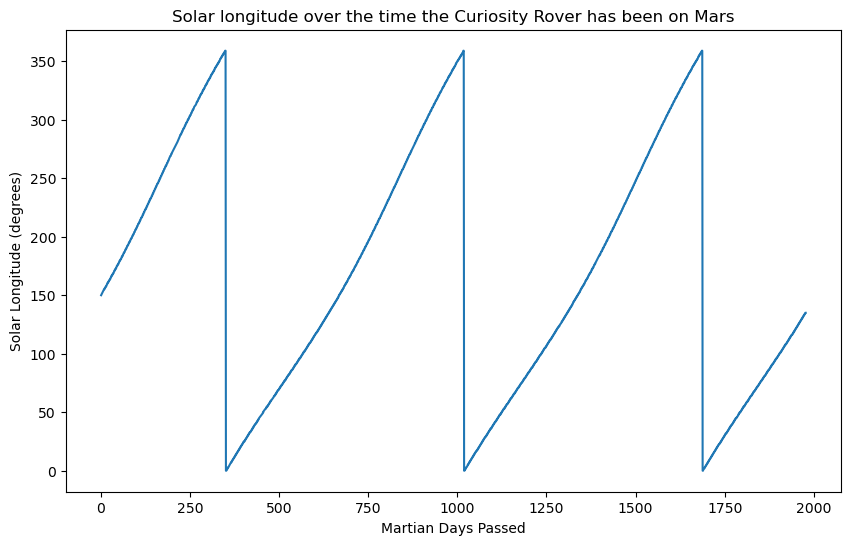

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="sol", y="ls", data=df)
plt.xlabel("Martian Days Passed")
plt.ylabel("Solar Longitude (degrees)")
plt.title("Solar longitude over the time the Curiosity Rover has been on Mars")
plt.show()

### Conclusions

Unfortunately, we have 3 columns that we wont be able to use:

- id (It's just the transmition id, so its not useful)
- wind_speed (completely null)
- atmo_opacity (unary column)

We have 3 numeric columns that are aligned with what we want to visualize: min and max temperatures and atmospheric pressure. These columns show very interesting cyclic behaviours. They are perfectly usable and look great.  

We also have categorical columns that can be used as filters, helping the user to evaluate metrics on different moments in time, different time intervals and with different perspectives.